Help from https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S2_SymbolicRendering.html

Developer Reference: https://web.mit.edu/music21/doc/developerReference/installJupyter.html#installjupyter

In [1]:
import os
from music21 import converter, chord, note, environment

In [2]:
# The following code cell sets up a music21 user environment file:

us = environment.UserSettings()
us_path = us.getSettingsPath()
if not os.path.exists(us_path):
    us.create()
print('Path to music21 environment', us_path)
print(us)

Path to music21 environment /home/cataluna84/.music21rc
{'directoryScratch': None, 'lilypondPath': '/home/cataluna84/Documents/PycharmProjects/Generative_Deep_Learning/lilypond', 'lilypondVersion': None, 'lilypondFormat': 'pdf', 'lilypondBackend': 'ps', 'musicxmlPath': '/usr/bin/musescore3', 'midiPath': None, 'graphicsPath': None, 'vectorPath': None, 'pdfPath': None, 'braillePath': None, 'musescoreDirectPNGPath': '/usr/bin/musescore3', 'showFormat': 'musicxml', 'writeFormat': 'musicxml', 'ipythonShowFormat': 'ipython.musicxml.png', 'autoDownload': 'ask', 'debug': '0', 'warnings': '1', 'localCorpusSettings': LocalCorpusSettings([]), 'localCorporaSettings': {}, 'manualCoreCorpusPath': None}


In [3]:
# Check to see if its properly imported
c = chord.Chord("C4 E4 G4")
c.isConsonant()

True

In [4]:
us = environment.UserSettings()
us.getSettingsPath()

PosixPath('/home/cataluna84/.music21rc')

In [5]:
# Next, we give the path to the MuseScore binary. The following code cell gives two typical locations for Linux and Windows environments. 
# Note that this could be different on your system and has to be changed, possibly. 
# Both, setting up the user environment file and the specification of the MuseScore path has to be executed only once.

us["musescoreDirectPNGPath"] = "/usr/bin/musescore3"
us["musicxmlPath"] = "/usr/bin/musescore3"

# Getting the data

You can find midi files for each of the 36 movements in the J.S. Bach Cello Suites here:

http://www.jsbach.net/midi/midi_solo_cello.html

Save these inside the './data/cello' folder

# Musical notation software

You'll also need to download some software to view and listen to the music generated by the model.

Musescore can be freely downloaded here:

https://musescore.org/en

# Viewing the data

In [6]:
dataset_name = 'cello'
filename = 'cs1-2all'
file = "./data/{}/{}.mid".format(dataset_name, filename)

original_score = converter.parse(file).chordify()

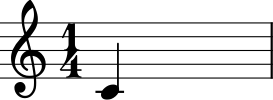

In [7]:
# If the setup is correct, the following code cell should create a music21 Note object and show its graphical rendition via MuseScore:

n = note.Note('c')
n.show('ipython.musicxml.png')

In [8]:
original_score.show()

KeyboardInterrupt: 

In [ ]:
original_score.show('text')

# Extracting the data

In [ ]:
notes = []
durations = []

for element in original_score.flat:
    
    if isinstance(element, chord.Chord):
        notes.append('.'.join(n.nameWithOctave for n in element.pitches))
        durations.append(element.duration.quarterLength)

    if isinstance(element, note.Note):
        if element.isRest:
            notes.append(str(element.name))
            durations.append(element.duration.quarterLength)
        else:
            notes.append(str(element.nameWithOctave))
            durations.append(element.duration.quarterLength)

    

In [ ]:
print('\nduration', 'pitch')
for n,d in zip(notes,durations):
    print(d, '\t', n)